Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
train_data = pd.read_csv('train_ctrUa4K.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
# Basic statistical information
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
### Preprocessing

In [8]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
num_data=train_data.select_dtypes(include=['int64','float64'])
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [10]:
cat_data=train_data.select_dtypes(include=['object','bool'])
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [11]:
train_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

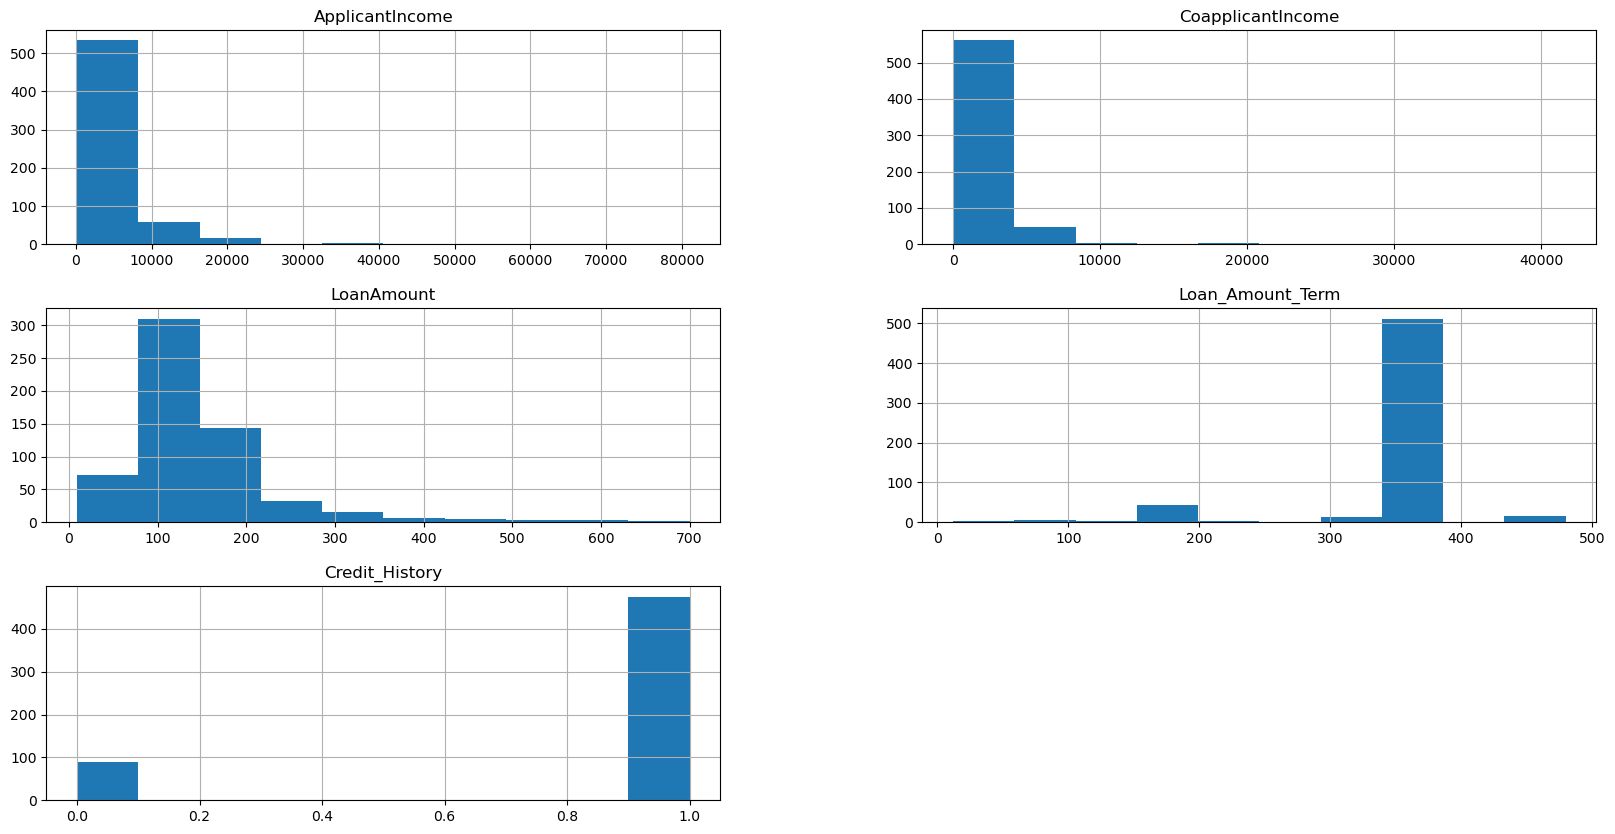

In [12]:
freqgraph = train_data.select_dtypes(include=['int64','float64'])
freqgraph.hist(figsize=(20,10))
plt.show()

In [13]:
# fill the missing values for numerical terms
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].median())

In [14]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# drop categorical missing values
train_data = train_data.dropna()
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Married'] = le.fit_transform(train_data['Married'])
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])
train_data['Education'] = le.fit_transform(train_data['Education'])
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])

### Exploratory Data Analysis

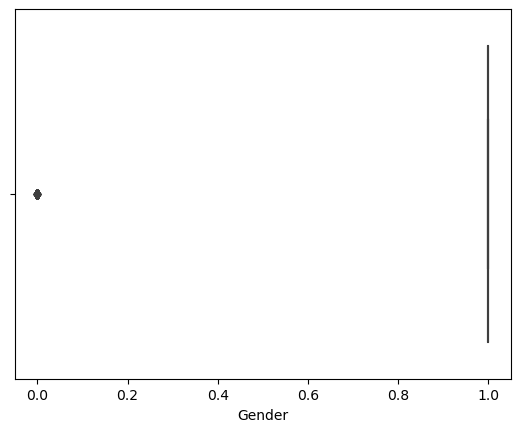

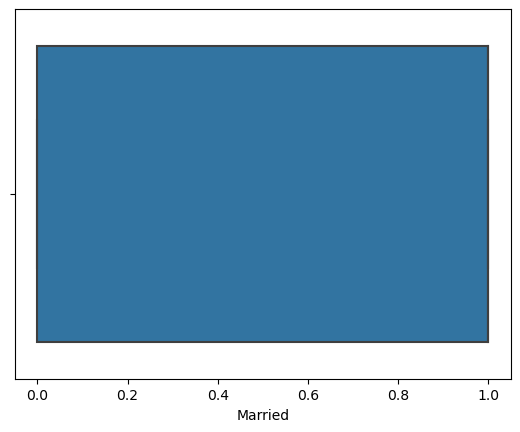

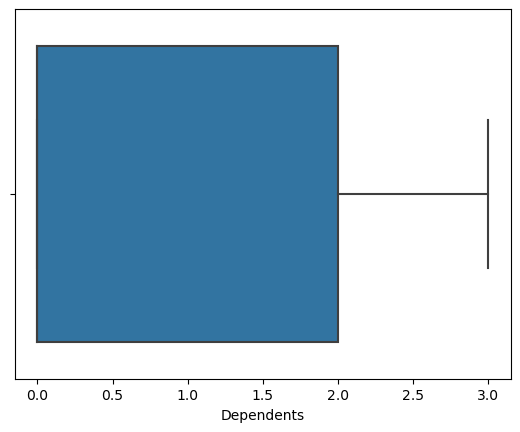

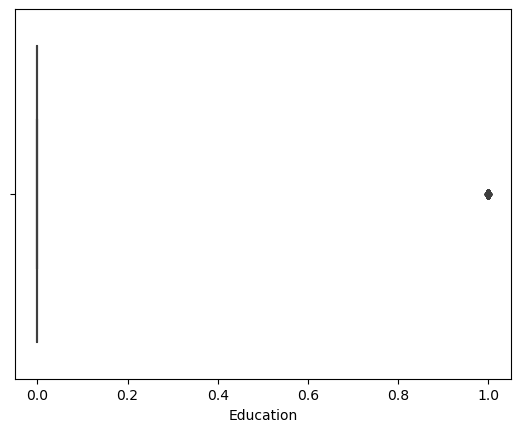

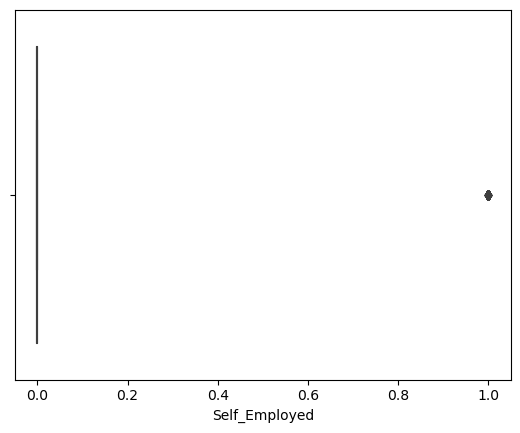

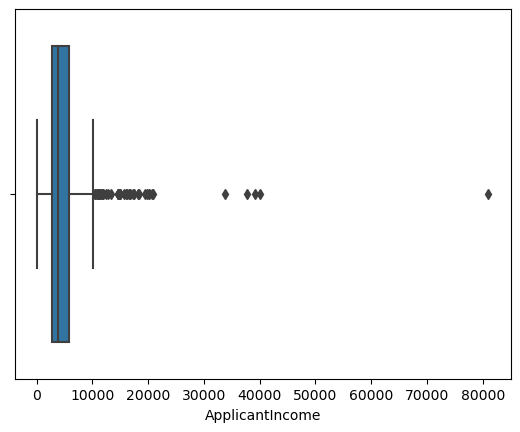

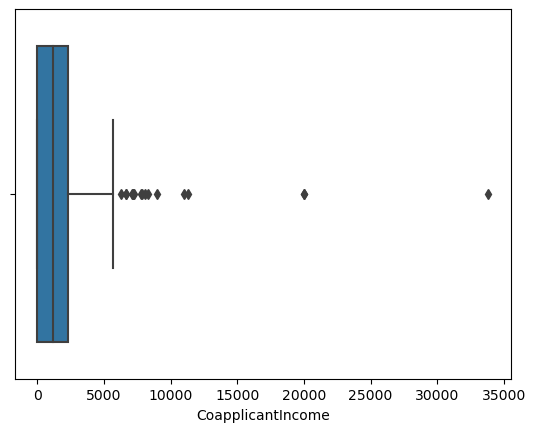

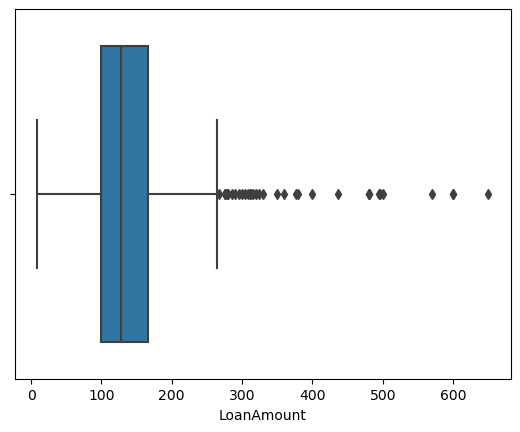

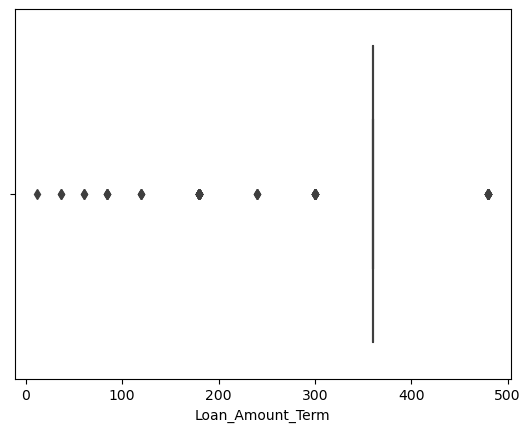

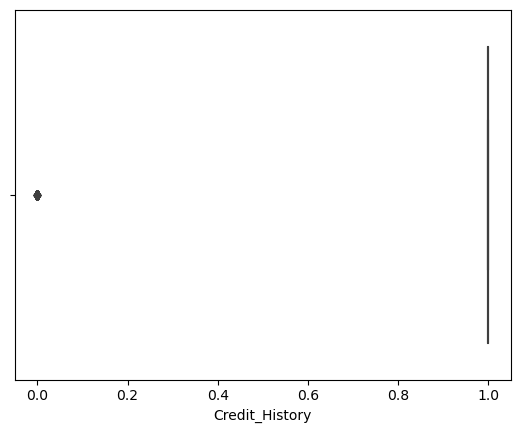

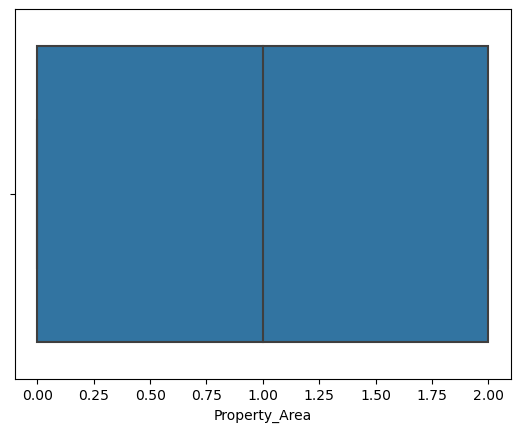

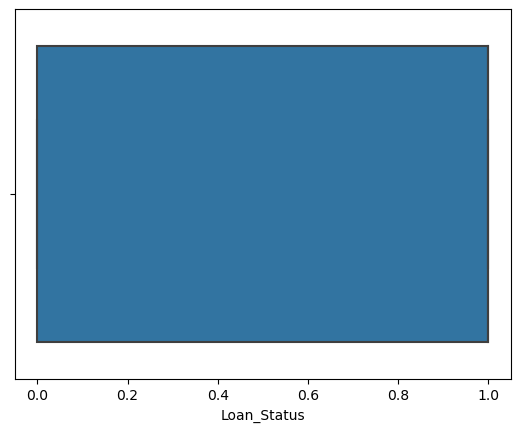

In [17]:
train = train_data.drop(columns = ['Loan_ID',],axis=1)
for i in train:
    sns.boxplot(x=train[i])
    plt.show()

<AxesSubplot: >

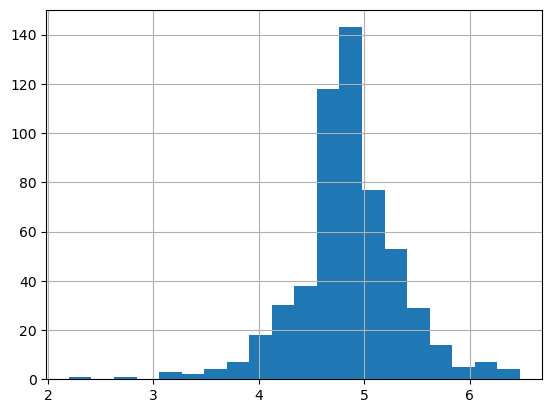

In [18]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)

In [19]:
train_data.LoanAmount_log.isna().sum()

0

<AxesSubplot: >

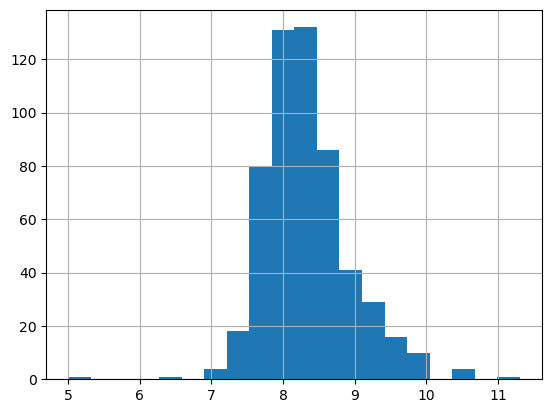

In [20]:
train_data['ApplicantIncome_log'] = np.log(train_data['ApplicantIncome'])
train_data['ApplicantIncome_log'].hist(bins=20)

In [21]:
train_data['Total_Income'] = train_data['ApplicantIncome'] +train_data['CoapplicantIncome']
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])

<AxesSubplot: >

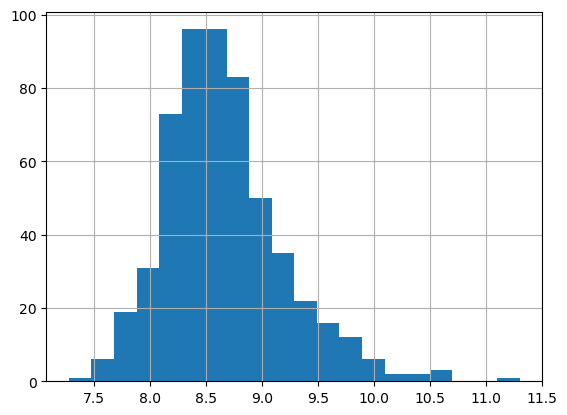

In [22]:
train_data['Total_Income_log'].hist(bins=20)

In [23]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,Total_Income,Total_Income_log
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,8.674026,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,8.430109,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,8.006368,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,7.856707,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,8.699515,6000.0,8.699515


<AxesSubplot: >

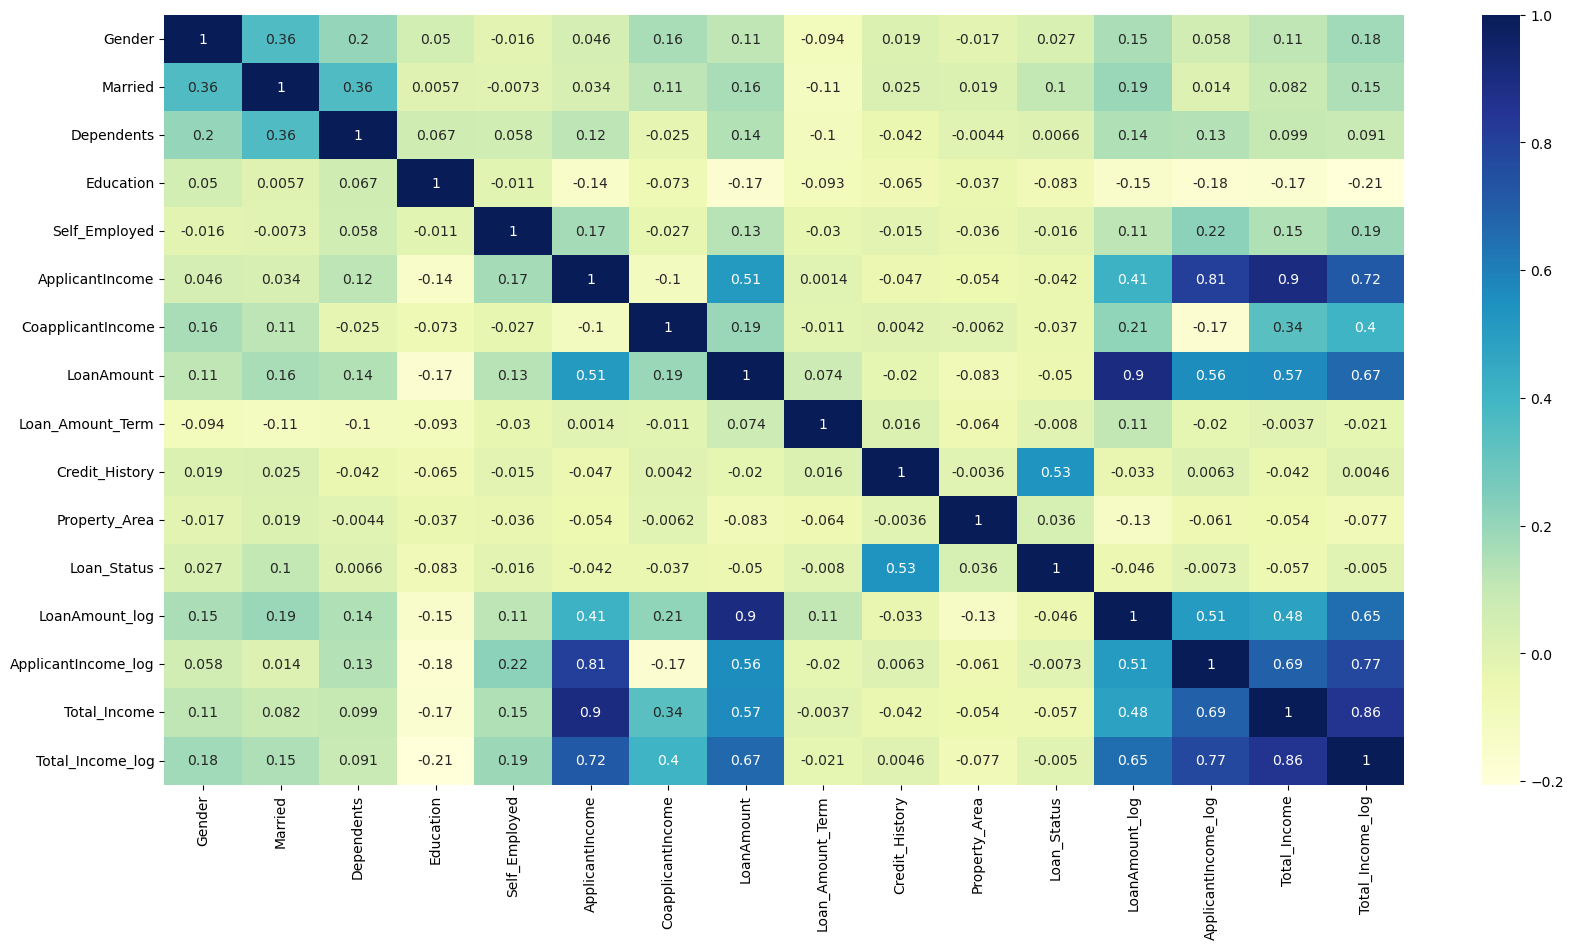

In [24]:
# Correlation Matrix
corrmatrix = train_data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [25]:
# drop
cols = ['ApplicantIncome','CoapplicantIncome','ApplicantIncome_log','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
train_data = train_data.drop(columns = cols, axis=1)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,4.852030,8.674026
1,1,1,1,0,0,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,4.948760,8.699515


In [26]:
# dept and indept
x = train_data.drop(columns = ['Loan_Status',],axis=1)
y = train_data['Loan_Status']

In [27]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income_log
0,1,0,0,0,0,1.0,2,4.852030,8.674026
1,1,1,1,0,0,1.0,0,4.852030,8.714568
2,1,1,0,0,1,1.0,2,4.189655,8.006368
3,1,1,0,1,0,1.0,2,4.787492,8.505323
4,1,0,0,0,0,1.0,2,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,4.262680,7.972466
610,1,1,3,0,0,1.0,0,3.688879,8.320205
611,1,1,1,0,0,1.0,2,5.533389,9.025456
612,1,1,2,0,0,1.0,2,5.231109,8.933664


In [28]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 554, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Model Training

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
# clf function
def clf(model, x, y):
    model.fit(x_train, y_train)
    print('Accuracy is : ', model.score(x_test,y_test)*100)
    cv_score = cross_val_score(model,x,y,cv=5)
    print('Cross validation is : ', np.mean(cv_score)*100)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf(model, x, y)

Accuracy is :  83.78378378378379
Cross validation is :  80.86650286650287


In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
clf(model, x, y)

Accuracy is :  68.46846846846847
Cross validation is :  70.76494676494677


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
clf(model, x, y)

Accuracy is :  83.78378378378379
Cross validation is :  77.98198198198199


In [35]:
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Precision =  0.8351648351648352
Recall =  0.9620253164556962
f1 score =  0.8941176470588236


In [37]:
conf_m = confusion_matrix(y_test,y_pred)

<AxesSubplot: >

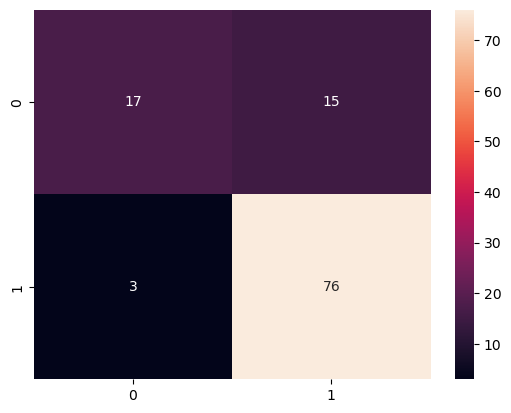

In [38]:
sns.heatmap(conf_m, annot=True)

### Hyperparameter Tuning

In [39]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7, max_features=1)
clf(model, x, y)

Accuracy is :  82.88288288288288
Cross validation is :  80.86650286650287


### TEST DATA

In [40]:
test_data  = pd.read_csv('test_lAUu6dG.csv')

In [41]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [43]:
test_data.shape

(367, 12)

In [44]:
test_data['CoapplicantIncome'] = test_data['CoapplicantIncome'].astype('float64')

In [45]:
test_data.dtypes['CoapplicantIncome']

dtype('float64')

In [46]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
num_data=test_data.select_dtypes(include=['int64','float64'])
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0.0,110.0,360.0,1.0
1,3076,1500.0,126.0,360.0,1.0
2,5000,1800.0,208.0,360.0,1.0
3,2340,2546.0,100.0,360.0,NaN
4,3276,0.0,78.0,360.0,1.0


In [48]:
cat_data=test_data.select_dtypes(include=['object','bool'])
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


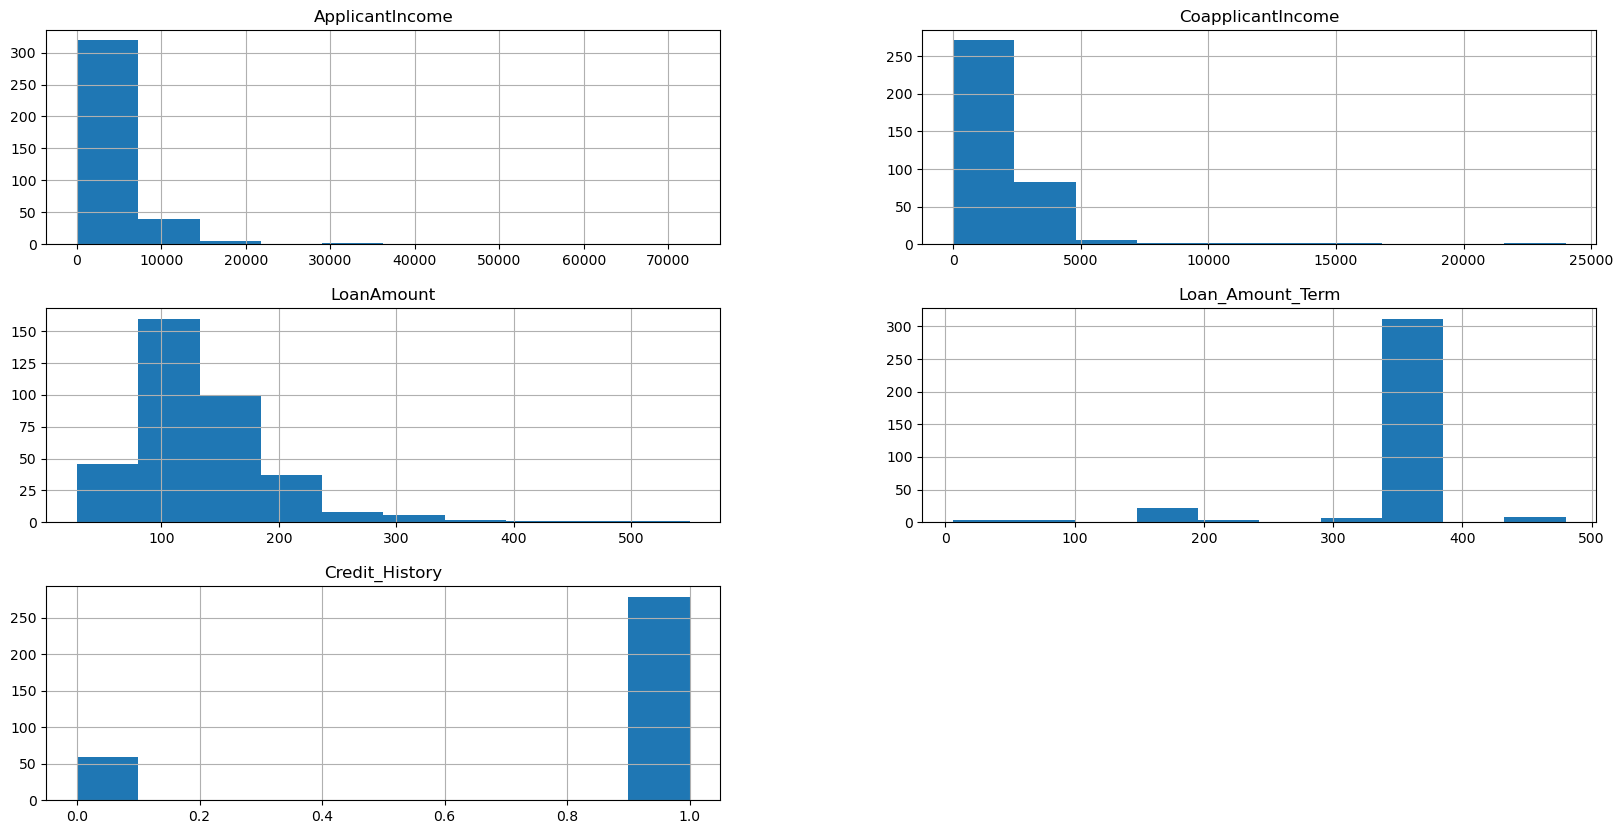

In [49]:
freqgraph = test_data.select_dtypes(include=['int64','float64'])
freqgraph.hist(figsize=(20,10))
plt.show()

In [50]:
# fill the missing values for numerical terms
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [51]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Dependents'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(test_data['Gender'].mode()[0],inplace=True)

In [52]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [53]:
# Label encoding
test_data['Gender'] = le.fit_transform(test_data['Gender'])
test_data['Married'] = le.fit_transform(test_data['Married'])
test_data['Dependents'] = le.fit_transform(test_data['Dependents'])
test_data['Education'] = le.fit_transform(test_data['Education'])
test_data['Self_Employed'] = le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area'] = le.fit_transform(test_data['Property_Area'])

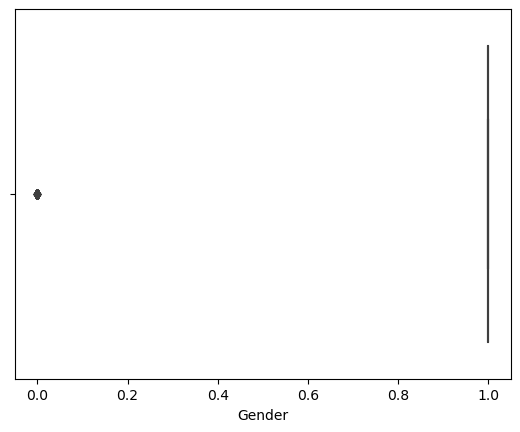

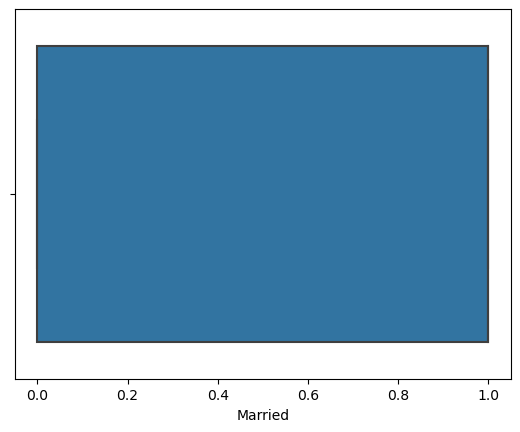

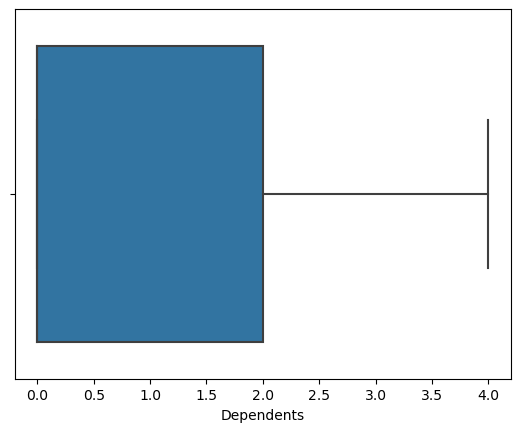

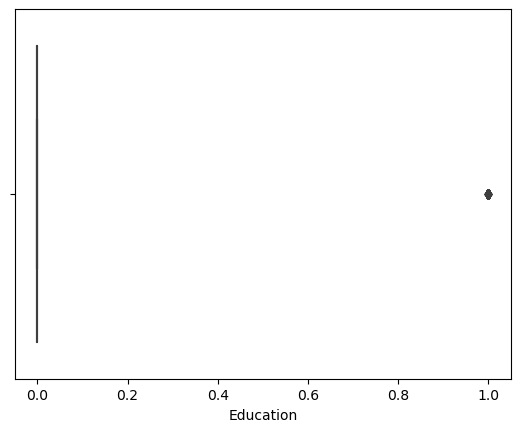

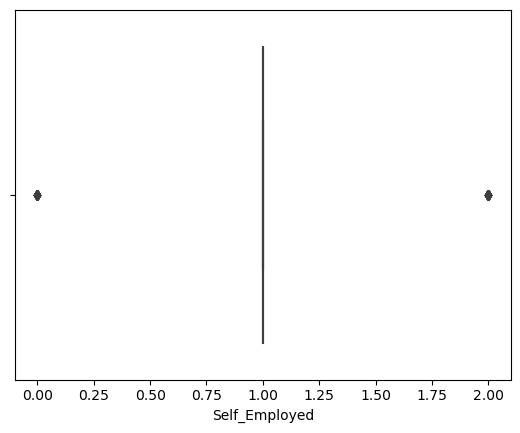

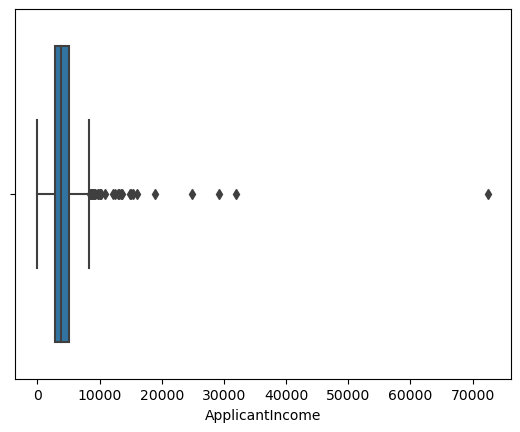

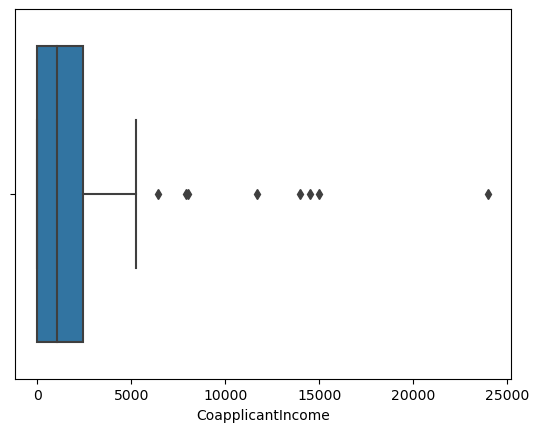

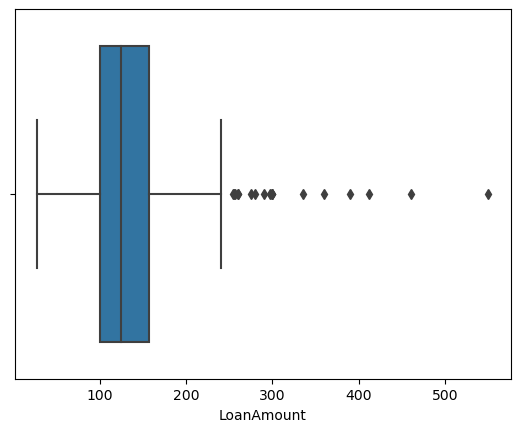

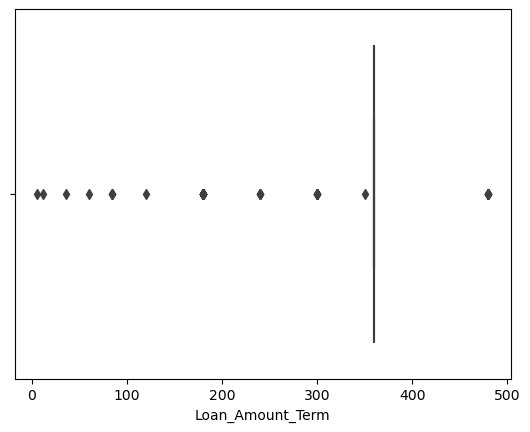

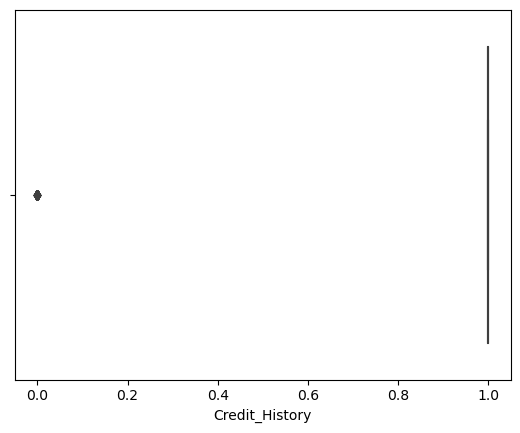

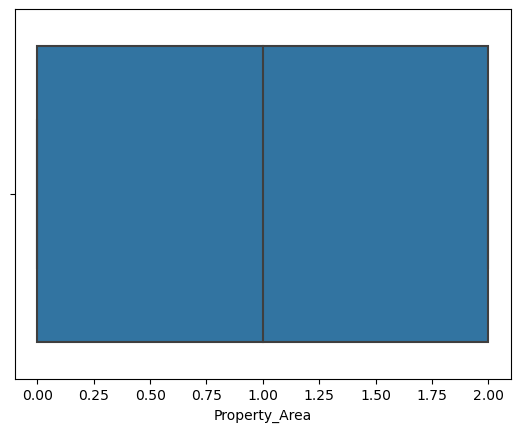

In [54]:
test = test_data.drop(columns = ['Loan_ID',],axis=1)
for i in test:
    sns.boxplot(x=test[i])
    plt.show()

In [55]:
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

In [56]:
test_data['ApplicantIncome_log']=np.log(test_data['ApplicantIncome'])

C:\Users\sobhi\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
test_data['Total_Income'] = test_data['ApplicantIncome'] +test_data['CoapplicantIncome']
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

<AxesSubplot: >

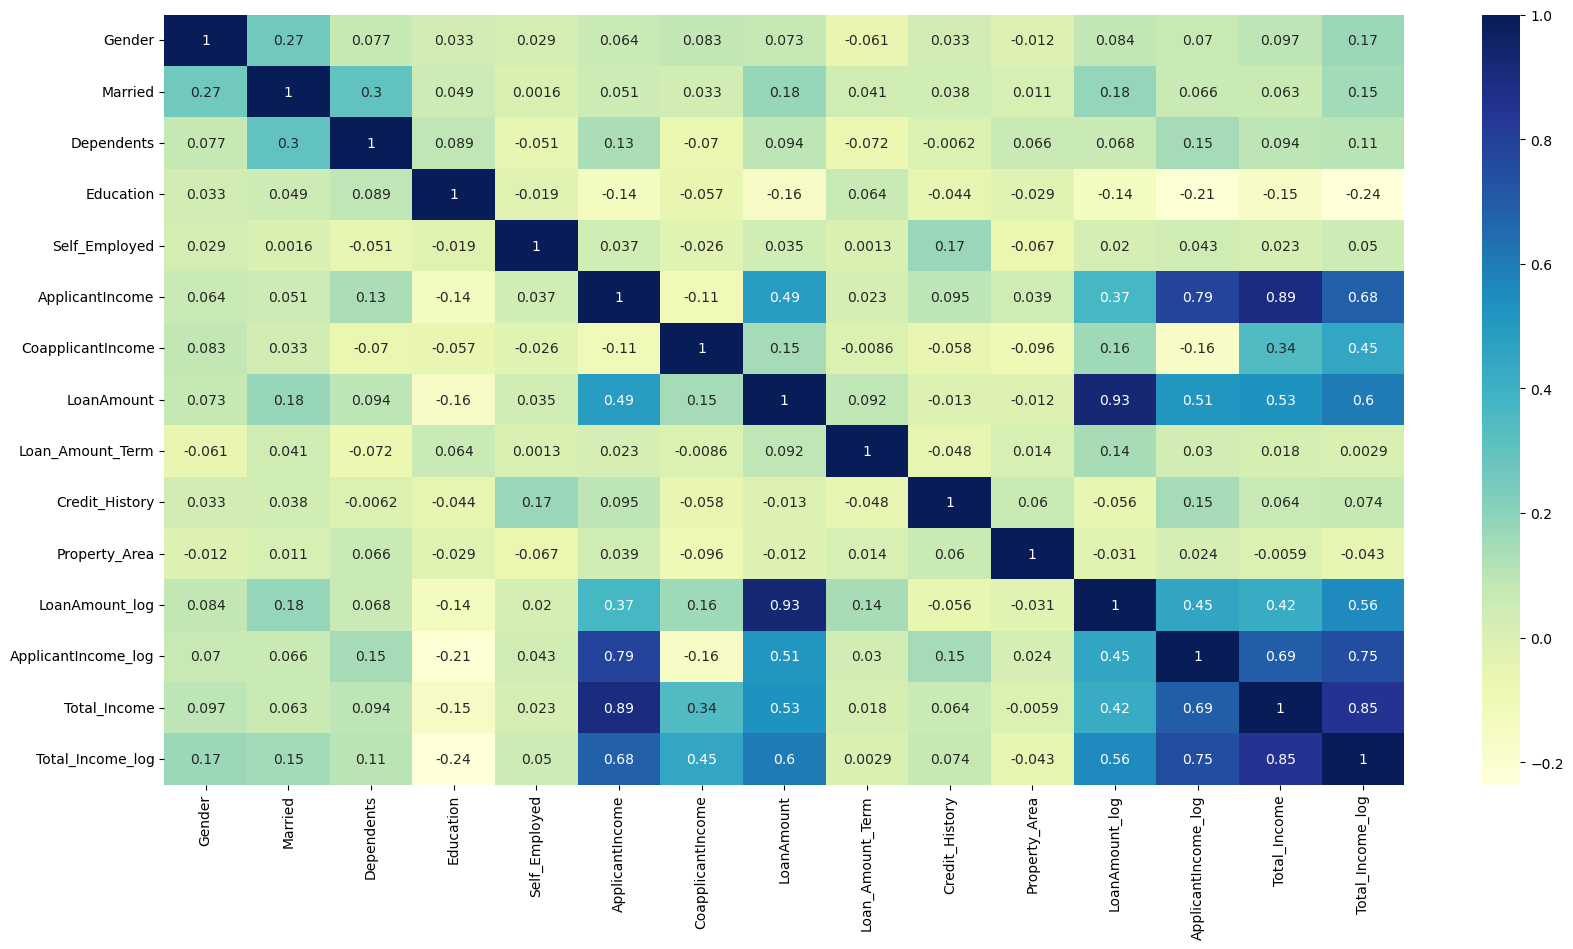

In [58]:
# Correlation Matrix
corrmatrix = test_data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [59]:
# drop
col = ['ApplicantIncome','ApplicantIncome_log','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
test_data = test_data.drop(columns = col, axis=1)
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income_log
0,1,1,0,0,1,1.0,2,4.700480,8.651724
1,1,1,1,0,1,1.0,2,4.836282,8.428581
2,1,1,2,0,1,1.0,2,5.337538,8.824678
3,1,1,2,0,1,1.0,2,4.605170,8.494129
4,1,0,0,1,1,1.0,2,4.356709,8.094378


In [60]:
pred = model.predict(test_data)

In [61]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [62]:
test_data['Loan_Status'] = pred
test_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income_log,Loan_Status
0,1,1,0,0,1,1.0,2,4.700480,8.651724,1
1,1,1,1,0,1,1.0,2,4.836282,8.428581,1
2,1,1,2,0,1,1.0,2,5.337538,8.824678,1
3,1,1,2,0,1,1.0,2,4.605170,8.494129,1
4,1,0,0,1,1,1.0,2,4.356709,8.094378,1
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,2,1.0,2,4.727388,8.663196,1
363,1,1,0,0,1,1.0,2,4.744932,8.490233,1
364,1,0,0,0,1,1.0,1,4.836282,8.564649,1
365,1,1,0,0,1,1.0,0,5.062595,8.908289,1


### Sample data prediction

In [63]:
sample_pred_data  = pd.read_csv('sample_submission_49d68Cx.csv')
sample_pred_data.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [64]:
for i in sample_pred_data:
    for j in test_data:
        if i == j:
            sample_pred_data['Loan_Status'] = test_data['Loan_Status']

In [65]:
sample_pred_data.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [66]:
sam = sample_pred_data['Loan_Status']
for i in sam:
    if i == 1:
        sample_pred_data['Loan_Status']='Y'
    elif i==0:
        sample_pred_data['Loan_Status']='N'
    else:
       sample_pred_data['Loan_Status']='null' 

In [67]:
sample_pred_data.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [68]:
sample_pred_data.set_index("Loan_ID", inplace = True)

In [69]:
sample_pred_data.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [70]:
sample_pred_data.to_csv('sample_submission_49d68Cx.csv')